# Data Science 2 - ESEO DSMT 
## Unsupervised Learning

## K-mean Clustering and Isolation Forest

### 30 Nov 2021  -- Prof. R. LONGO

K-mean Clustering
1. Basic Principles
2.  Elbow Method

Isolation Forest (anomalies detection)
1. Basic Principles
2. Application : Digits Outliers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

###  K-mean Clustering


In [2]:
from sklearn.cluster import KMeans


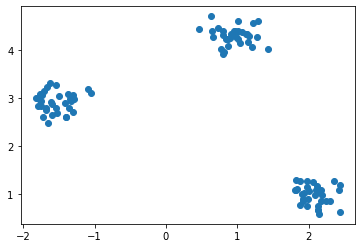

In [3]:
# Génération  données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.2, random_state=0)
plt.scatter(X[:,0], X[:,1]);

####  Basic Principles

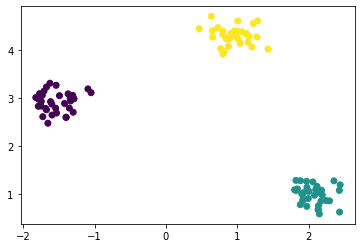

In [8]:
model = KMeans(n_clusters=3,init='k-means++')
model.fit(X)
predictions = model.predict(X)
plt.scatter(X[:,0],X[:,1],c=predictions)

In [9]:

model.cluster_centers_

array([[-1.538563  ,  2.91165191],
       [ 2.0720792 ,  0.98848385],
       [ 0.95164831,  4.28882085]])

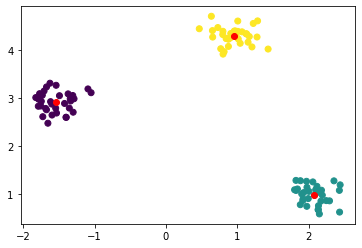

In [11]:
plt.scatter(X[:,0],X[:,1],c=predictions)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='red');

In [12]:
model.inertia_

7.717632820035167

In [13]:
model.score(X)

-7.717632820035166

#### Elbow Method


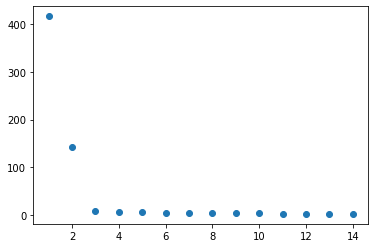

In [20]:
inertia = []
K_values = range(1,15)
for k in K_values:
    model = KMeans(n_clusters= k).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_values, inertia,'o');

### Isolation Forest (Anomalies detection)

1. Basic Principles


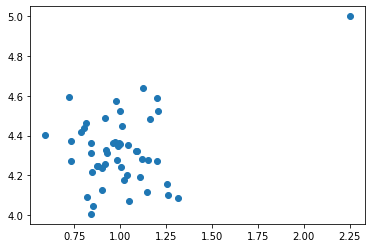

In [22]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.15, random_state=0)
X[15,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1]);

In [23]:
from sklearn.ensemble import IsolationForest

In [24]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [26]:
y_predict = model.predict(X)
outliers = model.predict(X)==-1
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

2. Application: Digits Outliers


In [27]:
from sklearn.datasets import load_digits

In [29]:
digits = load_digits()
X = digits.data
y = digits.target

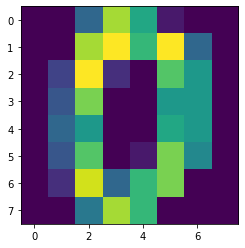

In [30]:
plt.imshow(X[0].reshape(8,8))

In [41]:
model = IsolationForest(contamination=0.02)
model.fit(X)
y_predict = model.predict(X)
outliers = model.predict(X)==-1
outliers_i = np.array(np.where(model.predict(X)==-1))
print(outliers_i.shape)


(1, 36)
